In [1]:
pip install mdtraj matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mdanalysis


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install MDAnalysis


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
 pip install tidynamics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/gpfsnyu/home/xz3067/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/base.py", line 2180, in __del__
    self.close()
  File "/gpfsnyu/home/xz3067/.local/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py", line 178, in close
    self._xdr.close()
AttributeError: 'XTCReader' object has no attribute '_xdr'


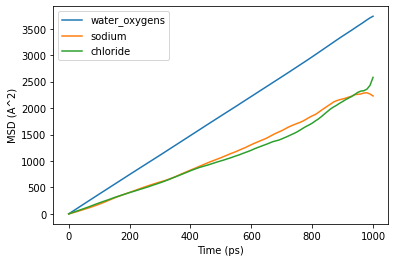

In [7]:
universe = mda.Universe('step5_3.gro','unwrapped.xtc')
oxygen_atoms = universe.select_atoms('name OH2')  # Adjust selection depending on naming convention in your trajectory
sodium = universe.select_atoms('name SOD')  # adjust atom name if different
chloride  = universe.select_atoms('name CLA')

msd_water_oxygens = EinsteinMSD(oxygen_atoms,msd_type='xyz',fft=True).run()
msd_sodium = EinsteinMSD(sodium,msd_type='xyz',fft=True).run()
msd_chloride = EinsteinMSD(chloride,msd_type='xyz',fft=True).run()
fig=plt.figure()

plt.plot(msd_water_oxygens.times,msd_water_oxygens.results.timeseries,label='water_oxygens')
plt.plot(msd_sodium.times,msd_sodium.results.timeseries,label='sodium')
plt.plot(msd_chloride.times,msd_chloride.results.timeseries,label='chloride')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (A^2)')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('MSD_vs_Time.png')